In [2]:
!pip install pandas_datareader

     |████████████████████████████████| 112kB 14.8MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 24.9MB/s eta 0:00:01


In [3]:
import pandas as pd
import numpy as np
import pandas_datareader as dr

In [4]:
start = "2014-06-23"
end = "2020-06-23"

In [16]:
portfolio = ["FB", "AMZN", "AAPL", "NFLX", "GOOGl"]

In [17]:
data = pd.DataFrame()

In [18]:
for stock in portfolio:
    data[stock] = dr.get_data_yahoo(stock, start, end)["Adj Close"]

In [19]:
data.head()

,FB,AMZN,AAPL,NFLX,GOOGl
Date,,,,,
2014-06-23,65.370003,327.239990,82.266121,62.788570,574.289978
2014-06-24,65.720001,324.160004,81.767960,62.337143,572.539978
2014-06-25,67.440002,327.440002,81.840439,63.458572,585.929993
2014-06-26,67.129997,325.690002,82.329529,62.801430,584.770020
2014-06-27,67.599998,324.570007,83.307701,63.154285,585.690002


In [20]:
weights = [0.2, 0.2, 0.2, 0.2, 0.2]

In [21]:
returns = data.pct_change()

In [22]:
returns.head()

,FB,AMZN,AAPL,NFLX,GOOGl
Date,,,,,
2014-06-23,NaN,NaN,NaN,NaN,NaN
2014-06-24,0.005354,-0.009412,-0.006055,-0.007190,-0.003047
2014-06-25,0.026172,0.010118,0.000886,0.017990,0.023387
2014-06-26,-0.004597,-0.005344,0.005976,-0.010355,-0.001980
2014-06-27,0.007001,-0.003439,0.011881,0.005619,0.001573


In [23]:
meansOfReturns = returns.mean()

In [24]:
meansOfReturns

FB       0.001047
AMZN     0.001583
AAPL     0.001130
NFLX     0.001680
GOOGl    0.000748
dtype: float64

In [25]:
sum(meansOfReturns * weights)

0.001237493439584492

In [27]:
portfolio = returns.dot(weights)

In [29]:
cumm_returns = (1 + portfolio).cumprod()

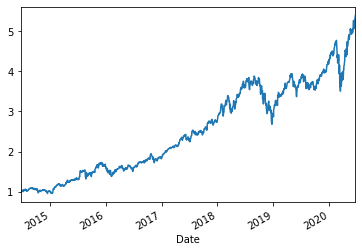

In [31]:
import matplotlib.pyplot as plt
cumm_returns.plot()
plt.show()

In [34]:
var_cov_matrix = returns.cov() * 250

In [35]:
weights

[0.2, 0.2, 0.2, 0.2, 0.2]

In [37]:
np.dot(np.dot(weights, var_cov_matrix), weights)

0.060597223271097775

In [42]:
sd = np.dot(np.dot(weights, var_cov_matrix), weights)

In [38]:
np.dot(np.dot(weights, var_cov_matrix), weights) * 100

6.059722327109777

In [39]:
rfr = 0

In [40]:
r = sum(meansOfReturns * weights)

In [41]:
r

0.001237493439584492

In [43]:
(r - rfr)/sd

0.020421619552569863